<a href="https://colab.research.google.com/github/neerajkumarvaid/ML_DL_RL_Codes/blob/master/Reinforcement_Learning/Epsilon_Greedy_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemenation of the epsilon-greedy algorithm for solving a multi-arm bandit problem with exploration-exploitation dilemma. 
We wil first import the required libraries such as numpy, matplotlib etc.

In [2]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np

Now we will initialize the parameters of the model.

In [28]:
NUM_TRIALS = 10000 # number trials to terminate the loop
EPS = 0.1 # esilon value - we will explore with probability < EPS
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] # Win probability of each bandit

In [14]:
# Create a class for obtaining Bandit instances
class BanditArm:
  def __init__(self, p):
    # p: the win rate
    self.p = p # initial win rate 
    self.p_estimate = 0. # Estinated win rate through exploitation/experiments
    self.N = 0 # # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N = self.N + 1 # update the number of trials
    self.p_estimate = self.p_estimate + (1//self.N)*(x- self.p_estimate)  # update the estimated win probability

optimal j: 2
mean estimate: 0.0
mean estimate: 1.0
mean estimate: 1.0
total reward earned: 7178.0
overall win rate: 0.7178
num_times_explored: 1013
num_times_exploited: 8987
num times selected optimal bandit: 9334


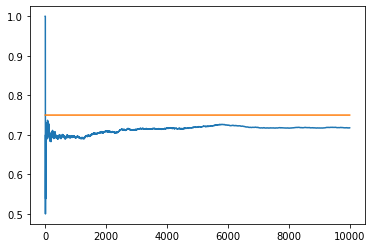

In [32]:
def experiment():
  bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES] # create a list of bandits

  rewards = np.zeros(NUM_TRIALS) # rewards earned in each trial
  num_times_explored = 0 
  num_times_exploited = 0
  num_optimal = 0 # number of times the optimal bandit is selected
  optimal_j = np.argmax([b.p for b in bandits]) # select the first bandit that has the maximum default win probability
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.choice(len(bandits))# select a random bandit during exploration
    else:
      num_times_exploited += 1
      j = optimal_j # exploit the bandit with maximum default win probability 

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment()
